In [1]:
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import numpy_groupies as npg
import pandas as pd
import scipy.stats as s
import scipy.special as ss
import sortedcontainers as sc
import os
import tqdm
import matplotlib

In [2]:
from statsmodels.discrete.discrete_model import NegativeBinomial as statsNB

In [3]:
os.environ["CAPY_REF_FA"] = "/home/opriebe/data/ref/hg19/Homo_sapiens_assembly19.fasta"
import hapaseg.coverage_MCMC as mcmc_cov
import hapaseg.NB_coverage_MCMC as nb_cov
from capy import mut, seq

Cannot find path to gnomAD index; gnomAD functionality disabled.


In [4]:
import hapaseg.coverage_DP as dp_cov

In [5]:
#loading cov_seg_df
cov_seg_df = pd.read_pickle('./cov_MCMC_df')

In [6]:
beta = np.load('./beta_save.npy')

In [7]:
cov_dp = dp_cov.Cov_DP(cov_seg_df, beta)

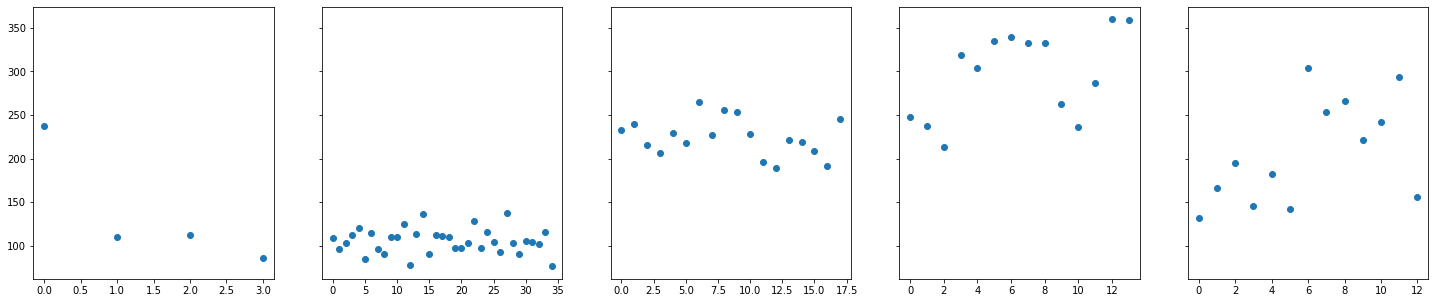

In [8]:
f, axs = plt.subplots(1,5, figsize=(25,5), sharey=True)
offset = 10
for seg in range(5):
    axs[seg].scatter(range(len(cov_dp.segment_r_list[seg+offset])), np.exp(np.log(cov_dp.segment_r_list[seg+offset]) - (cov_dp.segment_C_list[seg+offset] @ beta).flatten()))

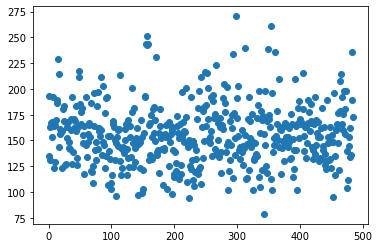

In [9]:
seg = 46
plt.scatter(range(len(cov_dp.segment_r_list[seg])), np.exp(np.log(cov_dp.segment_r_list[seg]) - (cov_dp.segment_C_list[seg] @ beta).flatten()))

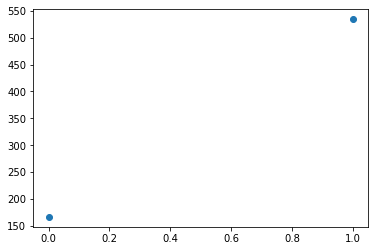

In [10]:
seg = 44
plt.scatter(range(len(cov_dp.segment_r_list[seg])), np.exp(np.log(cov_dp.segment_r_list[seg]) - (cov_dp.segment_C_list[seg] @ beta).flatten()))

In [9]:
cov_dp.run(2000)

n unassigned: 157
n unassigned: 120
n unassigned: 89
n unassigned: 65
n unassigned: 41
n unassigned: 28
n unassigned: 21
n unassigned: 12
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0
n unassigned: 0


In [10]:
[len(v) for k,v in cov_dp.cluster_dict.items()]

[15, 9, 13, 12, 14, 11, 19, 17, 8, 7, 4, 11, 10, 3, 4, 1]

In [12]:
list(cov_dp.cluster_counts.values())

[24, 11, 8, 11, 19, 8, 16, 11, 12, 4, 4, 6, 4, 5, 7, 1, 3, 3, 1]

In [88]:
cov_dp.cluster_dict

SortedDict({1: SortedSet([3, 36, 40, 41, 51, 69, 72, 126, 127, 132, 133, 137, 140, 143, 148]), 2: SortedSet([12, 13, 21, 27, 30, 47, 83, 90, 123]), 3: SortedSet([6, 7, 17, 20, 58, 76, 104, 131, 136, 145, 149, 154, 157]), 4: SortedSet([0, 5, 10, 34, 35, 44, 52, 94, 103, 108, 138, 150]), 5: SortedSet([2, 25, 29, 42, 57, 64, 82, 99, 100, 112, 115, 130, 144, 151]), 6: SortedSet([26, 31, 39, 48, 49, 65, 68, 75, 95, 102, 109]), 7: SortedSet([1, 8, 16, 18, 24, 59, 62, 70, 81, 85, 91, 98, 101, 105, 113, 120, 134, 135, 152]), 8: SortedSet([11, 15, 19, 23, 32, 50, 66, 97, 107, 117, 118, 121, 122, 124, 125, 128, 156]), 9: SortedSet([56, 63, 71, 77, 86, 87, 88, 92]), 10: SortedSet([33, 43, 45, 55, 60, 84, 111]), 11: SortedSet([14, 37, 54, 141]), 12: SortedSet([46, 61, 67, 74, 80, 93, 119, 129, 142, 146, 147]), 13: SortedSet([28, 38, 53, 73, 78, 79, 106, 114, 139, 155]), 14: SortedSet([9, 22, 96]), 15: SortedSet([4, 89, 110, 116]), 16: SortedSet([153])})

In [15]:
[len(cov_dp.segment_r_list[s]) for s in cov_dp.cluster_dict[5]]

[8, 4, 9, 12, 53, 529, 12, 46, 20, 29, 12, 126, 16, 4]

In [17]:
len(cov_dp.segment_r_list[130])

126

In [91]:
cov_dp.cluster_dict[5]

SortedSet([2, 25, 29, 42, 57, 64, 82, 99, 100, 112, 115, 130, 144, 151])

In [92]:
cov_dp.cluster_dict[5].union([130])

SortedSet([2, 25, 29, 42, 57, 64, 82, 99, 100, 112, 115, 130, 144, 151])

In [99]:
cov_dp._ML_cluster(cov_dp.cluster_dict[5].union([130]))

-10133.582581341368

In [100]:
cov_dp._ML_cluster(cov_dp.cluster_dict[5])

-10133.582581341368

In [101]:
cov_dp.cluster_MLs[5]

-3512.2768316193974

In [102]:
np.array([ML for (ID, ML) in cov_dp.cluster_MLs.items()])

array([-4720.470367  , -2020.16753241, -2105.24886059,  -337.749003  ,
       -3512.27683162, -1881.34101663, -2492.61995001, -5087.03778296,
       -1384.98571326,  -268.90896659, -1968.86045769, -1835.51032645,
         -22.24241146, -2441.34004142, -5827.48514283,  -158.72609019])

In [105]:
[cov_dp._ML_cluster(cov_dp.cluster_dict[c]) for c in cov_dp.cluster_dict.keys()]

[-12951.387853411361,
 -2169.9483898558824,
 -6962.97921249611,
 -5619.741748014089,
 -10133.582581341368,
 -3545.9184097408406,
 -3961.9591944009217,
 -6271.690158181765,
 -5024.451204243528,
 -7443.678043841893,
 -2020.1675324083462,
 -11312.22862037196,
 -3877.384305597995,
 -2573.0966699715186,
 -6178.9170487347965,
 -158.72609018940062]

In [76]:
ML_AB = cov_dp.cluster_MLs[5]

In [77]:
ML_A = cov_dp._ML_cluster(cov_dp.cluster_dict[5].difference([130]))

In [78]:
ML_S = cov_dp._ML_cluster([130])

In [79]:
ML_C = np.array([ML for (ID, ML) in cov_dp.cluster_MLs.items()])

In [80]:
ML_BC = np.array([cov_dp._ML_cluster(cov_dp.cluster_dict[k].union([130])) for k in cov_dp.cluster_counts.keys()])

In [81]:
ML_rat_BC = ML_A + ML_BC - (ML_AB + ML_C)

In [82]:
ML_S

-1335.4883804953272

In [83]:
ML_AB

-3512.2768316193974

In [84]:
ML_A

-8631.74372921567

In [85]:
ML_BC

array([-14424.15378371,  -3660.72855431,  -8495.53968636,  -7205.15011918,
       -10133.58258134,  -5003.51037333,  -5442.24114274,  -7665.8325871 ,
        -6710.55973629,  -8895.81254251,  -3410.04901449, -12809.98049633,
        -5411.11609824,  -4137.57336464,  -7722.23858695,  -1586.63812412])

In [86]:
ML_C

array([-4720.470367  , -2020.16753241, -2105.24886059,  -337.749003  ,
       -3512.27683162, -1881.34101663, -2492.61995001, -5087.03778296,
       -1384.98571326,  -268.90896659, -1968.86045769, -1835.51032645,
         -22.24241146, -2441.34004142, -5827.48514283,  -158.72609019])

In [87]:
ML_BC- ML_C

array([ -9703.68341671,  -1640.5610219 ,  -6390.29082577,  -6867.40111618,
        -6621.30574972,  -3122.1693567 ,  -2949.62119273,  -2578.79480414,
        -5325.57402302,  -8626.90357592,  -1441.1885568 , -10974.47016988,
        -5388.87368678,  -1696.23332321,  -1894.75344412,  -1427.91203393])

In [34]:
ML_rat_BC

array([-14823.15031431,  -6760.02791949, -11509.75772337, -11986.86801378,
       -11740.77264732,  -8241.6362543 ,  -8069.08809033,  -7698.26170173,
       -10445.04092062, -13746.37047352,  -6560.6554544 , -16093.93706748,
       -10508.34058438,  -6815.70022081,  -7014.22034172,  -6547.37893153])

In [72]:
ML_rat_BC[5-1] = ML_AB - ML_A

In [73]:
ML_new = ML_A + ML_S - ML_AB

In [74]:
ML_new

-6454.9552780916

In [62]:
ML_rat = np.r_[ML_rat_BC, ML_new]

In [63]:
ML_rat

array([-14823.15031431,  -6760.02791949, -11509.75772337, -11986.86801378,
         5119.4668976 ,  -8241.6362543 ,  -8069.08809033,  -7698.26170173,
       -10445.04092062, -13746.37047352,  -6560.6554544 , -16093.93706748,
       -10508.34058438,  -6815.70022081,  -7014.22034172,  -6547.37893153,
        -6454.95527809])

In [57]:
c_counts = np.array([v for k, v in cov_dp.cluster_counts.items()])
p_ct = c_counts / (cov_dp.alpha + c_counts.sum())
pct_new = cov_dp.alpha / (cov_dp.alpha + c_counts.sum())
p_ct = np.r_[p_ct, pct_new]

In [58]:
MLs_max = ML_rat.max()
choice_p = np.exp(ML_rat - MLs_max + np.log(p_ct)) / np.exp(
    ML_rat - MLs_max + np.log(p_ct)).sum()
#print('choice_p: ', choice_p)
choice_idx = np.random.choice(
    np.r_[1:len(ML_rat) + 1],
    p=choice_p
)

In [59]:
choice_p

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

using global beta

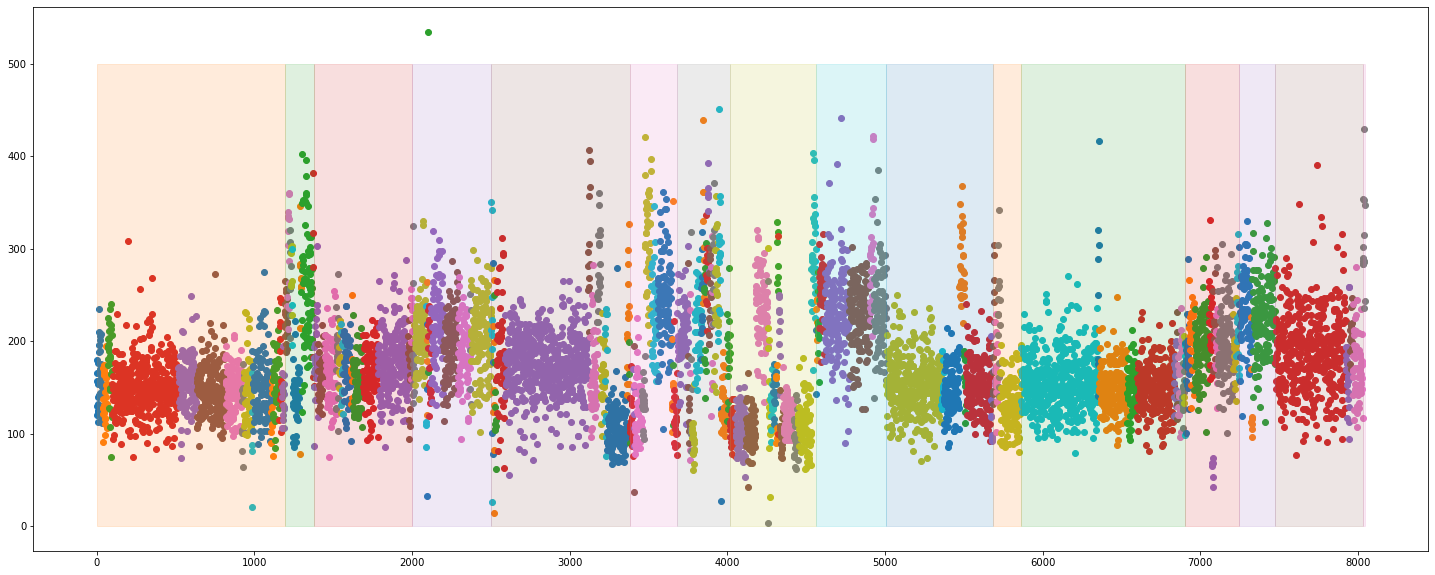

In [75]:
cur = 0
f, axs = plt.subplots(1, figsize = (25,10))
for c in cov_dp.cluster_dict.keys():
    clust_start = cur
    for seg in cov_dp.cluster_dict[c]:
        len_seg = len(cov_dp.segment_r_list[seg])
        axs.scatter(np.r_[cur:len_seg+cur], np.exp(np.log(cov_dp.segment_r_list[seg]) - (cov_dp.segment_C_list[seg] @ beta).flatten()))
        cur += len_seg
    axs.add_patch(matplotlib.patches.Rectangle((clust_start,0), cur-clust_start, 500, fill=True, alpha=0.15, color = colors[c % 10]))

using beta fit for each cluster

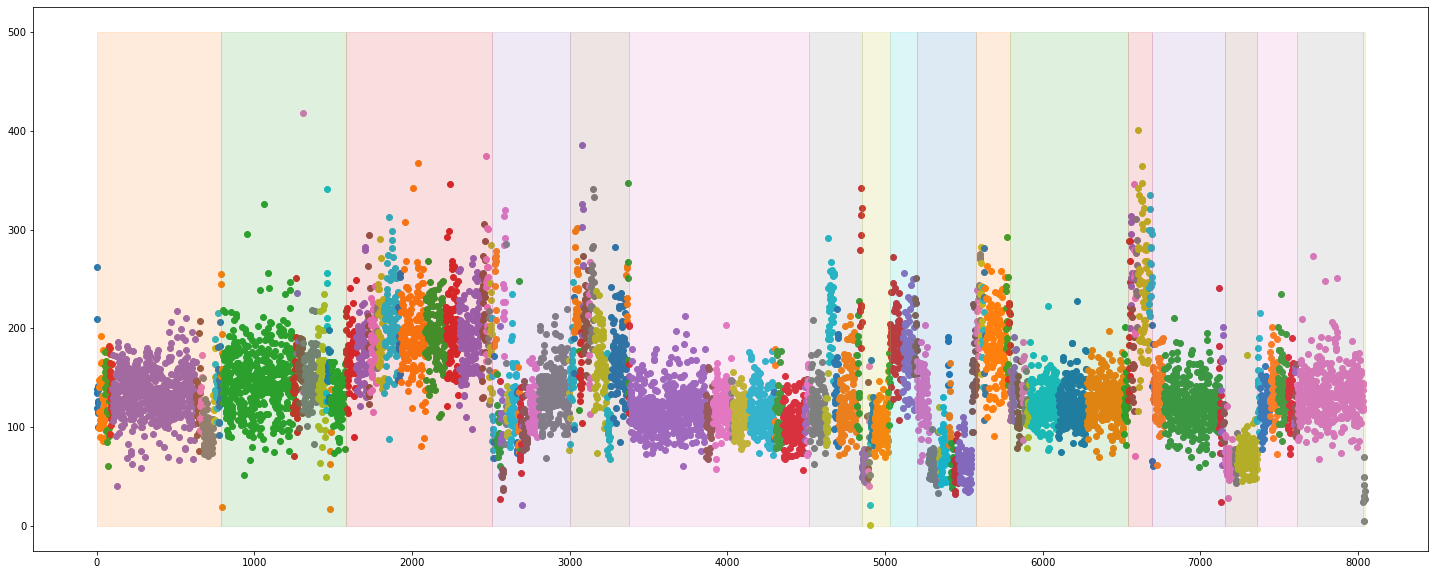

In [18]:
cur = 0
f, axs = plt.subplots(1, figsize = (25,10))
for c in cov_dp.cluster_dict.keys():
    clust_start = cur
    for seg in cov_dp.cluster_dict[c]:
        len_seg = len(cov_dp.segment_r_list[seg])
        axs.scatter(np.r_[cur:len_seg+cur], np.exp(np.log(cov_dp.segment_r_list[seg]) - (cov_dp.segment_C_list[seg] @ betas[c-1]).flatten()))
        cur += len_seg
    axs.add_patch(matplotlib.patches.Rectangle((clust_start,0), cur-clust_start, 500, fill=True, alpha=0.15, color = colors[c % 10]))

In [11]:
cov_seg_df['cov_DP_mu'] = 0
cov_seg_df['cov_DP_clust'] = 0

In [16]:
betas = []
for c in cov_dp.cluster_dict.keys():
    r = np.hstack([cov_dp.segment_r_list[i] for i in cov_dp.cluster_dict[c]])
    C = np.concatenate([cov_dp.segment_C_list[i] for i in cov_dp.cluster_dict[c]])
    endog = r
    exog = np.c_[np.ones(r.shape), C]
    sNB = statsNB(endog, exog)
    res = sNB.fit()
    mu = res.params[0]
    betas.append(res.params[1:4])
    cov_seg_df.loc[cov_seg_df.segment_ID.isin(cov_dp.cluster_dict[c]), 'cov_DP_mu'] = mu
    cov_seg_df.loc[cov_seg_df.segment_ID.isin(cov_dp.cluster_dict[c]), 'cov_DP_clust'] = c

Optimization terminated successfully.
         Current function value: 11.190418
         Iterations: 13
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 11.271284
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 11.178797
         Iterations: 13
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 11.411880
         Iterations: 15
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 11.563624
         Iterations: 12
         Function evaluations: 77
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 10.793856
         Iterations: 14
         Function evaluations: 21
         Gradient evaluations: 21


In [11]:
cov_seg_df['cov_DP_mu'] = 0
cov_seg_df['cov_DP_clust'] = 0

In [25]:
for c in cov_dp.cluster_dict.keys():
    r = np.hstack([cov_dp.segment_r_list[i] for i in cov_dp.cluster_dict[c]])
    C = np.concatenate([cov_dp.segment_C_list[i] for i in cov_dp.cluster_dict[c]])
    endog = np.exp(np.log(r) - (C @ beta).flatten())
    exog = np.ones(r.shape)
    sNB = statsNB(endog, exog)
    res = sNB.fit()
    mu = res.params[0]
    cov_seg_df.loc[cov_seg_df.segment_ID.isin(cov_dp.cluster_dict[c]), 'cov_DP_mu'] = mu
    cov_seg_df.loc[cov_seg_df.segment_ID.isin(cov_dp.cluster_dict[c]), 'cov_DP_clust'] = c

Optimization terminated successfully.
         Current function value: 5.479447
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 5.450858
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 4.958723
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 5.740170
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 5.358696
         Iterations: 4
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 5.199918
         Iterations: 6
         Function evaluations: 8
         Gradient e

In [12]:
colors = mpl.cm.get_cmap("tab10").colors

### Load coverage

In [19]:
Cov = pd.read_csv("exome/6_C1D1_META.cov", sep = "\t", names = ["chr", "start", "end", "covcorr", "covraw"], low_memory=False)
Cov["chr"] = mut.convert_chr(Cov["chr"])
Cov = Cov.loc[Cov["chr"] != 0]
Cov["start_g"] = seq.chrpos2gpos(Cov["chr"], Cov["start"])
Cov["end_g"] = seq.chrpos2gpos(Cov["chr"], Cov["end"])

### Load covariates

In [20]:
Cov["C_len"] = Cov["end"] - Cov["start"] + 1

# load repl timing
F = pd.read_pickle("covars/GSE137764_H1.hg19_liftover.pickle")

# map targets to RT intervals
tidx = mut.map_mutations_to_targets(Cov.rename(columns = { "start" : "pos" }), F, inplace = False)
Cov.loc[tidx.index, "C_RT"] = F.iloc[tidx, 3:].mean(1).values

# z-transform
Cov["C_RT_z"] = (lambda x : (x - np.nanmean(x))/np.nanstd(x))(np.log(Cov["C_RT"] + 1e-20))

#load GC content
B = pd.read_pickle("covars/GC.pickle")
Cov = Cov.merge(B.rename(columns = { "gc" : "C_GC" }), left_on = ["chr", "start", "end"], right_on = ["chr", "start", "end"], how = "left")
Cov["C_GC_z"] = (lambda x : (x - np.nanmean(x))/np.nanstd(x))(np.log(Cov["C_GC"] + 1e-20))

In [21]:
clust = np.load("exome/6_C1D1_META.DP_clusts.auto_ref_correct.overdispersion92.no_phase_correct.npz")

#### Load chromosome boundary coordinates

In [22]:
allelic_segs = pd.read_pickle("exome/6_C1D1_META.allelic_segs.auto_ref_correct.overdispersion92.no_phase_correct.pickle")
chrbdy = allelic_segs.dropna().loc[:, ["start", "end"]]
chr_ends = chrbdy.loc[chrbdy["start"] != 0, "end"].cumsum()

In [23]:
clust["snps_to_clusters"].shape

(500, 11768)

In [24]:
SNPs = pd.read_pickle("exome/6_C1D1_META.SNPs.pickle")
SNPs["chr"], SNPs["pos"] = seq.gpos2chrpos(SNPs["gpos"])

SNPs["tidx"] = mut.map_mutations_to_targets(SNPs, Cov, inplace = False)

#generate unique clust assignments
clust_u, clust_uj = np.unique(clust["snps_to_clusters"], return_inverse = True)
clust_uj = clust_uj.reshape(clust["snps_to_clusters"].shape)

### load SNPs from single DP iteration

In [25]:
iter_ind = 499
SNPs = pd.read_pickle("exome/6_C1D1_META.SNPs.pickle")
SNPs["chr"], SNPs["pos"] = seq.gpos2chrpos(SNPs["gpos"])

SNPs["tidx"] = mut.map_mutations_to_targets(SNPs, Cov, inplace = False)

#generate unique clust assignments
clust_u, clust_uj = np.unique(clust["snps_to_clusters"], return_inverse = True)
clust_uj = clust_uj.reshape(clust["snps_to_clusters"].shape)

#assign coverage intervals to clusters
Cov_clust_probs = np.zeros([len(Cov), clust_u.max()])

for targ, snp_idx in SNPs.groupby("tidx").indices.items():
    targ_clust_hist = np.bincount(clust_uj[499, snp_idx].ravel(), minlength = clust_u.max())

    Cov_clust_probs[int(targ), :] = targ_clust_hist/targ_clust_hist.sum()

#subset intervals containing SNPs
overlap_idx = Cov_clust_probs.sum(1) > 0
Cov_clust_probs_overlap = Cov_clust_probs[overlap_idx, :]

#prune improbable assignments
Cov_clust_probs_overlap[Cov_clust_probs_overlap < 0.05] = 0
Cov_clust_probs_overlap /= Cov_clust_probs_overlap.sum(1)[:, None]
prune_idx = Cov_clust_probs_overlap.sum(0) > 0
Cov_clust_probs_overlap = Cov_clust_probs_overlap[:, prune_idx]

In [26]:
min_tots = np.zeros(clust_uj.max() + 1)
maj_tots = np.zeros(clust_uj.max() + 1)
for clusts, phases in zip(clust_uj, clust["snps_to_phases"]):
    # reset phases
    SNPs2 = SNPs.copy()
    SNPs2.iloc[phases, [0, 1]] = SNPs2.iloc[phases, [1, 0]]

    maj_tots += npg.aggregate(clusts, SNPs2["maj"], size = clust_uj.max() + 1)
    min_tots += npg.aggregate(clusts, SNPs2["min"], size = clust_uj.max() + 1)

min_tots /= clust_uj.shape[0]
maj_tots /= clust_uj.shape[0]

#### Remove DP clusters that had overall low assignment probabilities

In [27]:
f_prune = (min_tots/(min_tots + maj_tots))[np.flatnonzero(prune_idx)]

####  Plot

To make targets clearer when plotting, show each target as \[start_i, start_{i+1}\]

In [28]:
cov_seg_df["next_g"] = np.r_[cov_seg_df.iloc[1:]["start_g"], 2880794554]

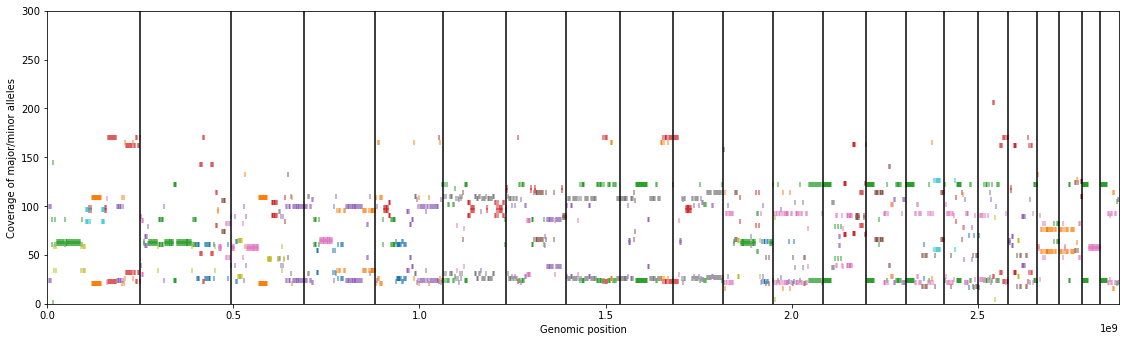

In [38]:
plt.figure(6, figsize = [19.2, 5.39]); plt.clf()
for i in np.r_[1:int(cov_seg_df.cov_DP_clust.max())]:
    x = cov_seg_df.loc[cov_seg_df.cov_DP_clust==i, ["start_g", "next_g", 'cov_DP_mu', 'cluster_assgn']]
    for (_, st, en, mu, a_clust) in x.itertuples():
        plt.plot(
            np.r_[st, en],
            np.exp(mu)*f_prune[a_clust]*np.r_[1, 1],
            color = np.array(colors)[i % len(colors)],
            linewidth = 5,
            solid_capstyle = "butt"
        )
        plt.plot(
            np.r_[st, en],
            np.exp(mu)*(1 - f_prune[a_clust])*np.r_[1, 1],
            color = np.array(colors)[i % len(colors)],
            linewidth = 5,
            solid_capstyle = "butt"
        )

for chrbdy in chr_ends[:-1]:
    plt.axvline(chrbdy, color = 'k')

plt.xlabel("Genomic position")
plt.ylabel("Coverage of major/minor alleles")

plt.xlim((0.0, 2879000000.0));
plt.ylim([0, 300]);